<a href="https://colab.research.google.com/github/mykolesiko/eeg_article/blob/main/MADE_no_neutral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir("/content/drive/MyDrive/MADE/Project/deap")

In [4]:
pip install mrmr_selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 4.1 MB/s 


In [5]:
!pip install -U pymrmr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.3 MB/s 
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp37-cp37m-linux_x86_64.whl size=276661 sha256=f197f3d4616b8f0d715427899073fcd1a95f2852e7ba34bfe38654b7112528d7
  Stored in directory: /root/.cache/pip/wheels/81/95/66/05731ac334bc74a1251a727af18eb28dc027217ee817a0cab6
Successfully built pymrmr


In [6]:
import pymrmr

In [7]:
import pickle
x = pickle.load(open('./data_preprocessed_python/s01.dat', 'rb'), encoding='latin1')

In [8]:
data = x['data']
labels = x['labels']

The logarithms of the spectral power from
theta (4-8 Hz), slow alpha (8-10 Hz), alpha (8-12 Hz), beta
(12-30Hz) and gamma (30+ Hz) bands were extracted
from all 32 electrodes as features. In addition to power
spectral features the difference between the spectral
power of all the symmetrical pairs of electrodes on
the right and left hemisphere was extracted to measure
the possible asymmetry in the brain activities due to
emotional stimuli. 

Пары симметричных каналов слева-справа и спереди-сзади

In [9]:
import scipy
from  scipy import signal
freq, power = signal.welch(data[0][0], fs=128.0, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
freq_ranges = [range(4,9), range(8,13), range(12, 31), range(30,48), range(12, 15), range(15, 20)]
pairs_canals = [[1, 17], [2, 18], [3, 20], [4, 21], [5, 22], [6, 23], [7, 25], [8, 26], [9, 27], [10, 28], [11, 29], [12, 30], [13, 31], [14, 32]]
#FC5-CP5, FC1-CP1, FC2-CP2, FC6-CP6, F7-P7, F3-P3, Fz-Pz,F4-P4, F8-P8, Fp1-O1, Fp2-O2
pairs_canals_1 = [[6, 21], [5, 9], [26, 30], [21, 25], [3, 11], [4, 12], [31, 32], [27, 19], [28, 20], [1, 15], [30, 17] ]
import numpy as np
import scipy
from scipy import stats
freq_resolution = max(freq)/(len(freq) - 1)
max_freq = 128
NVIDEOS = 40
NCANALS = 32

In [10]:
print(freq)
print(freq_resolution)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5 50.  50.5 51.  51.5 52.  52.5 53.  53.5 54.  54.5 55.  55.5
 56.  56.5 57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  61.5 62.  62.5
 63.  63.5 64. ]
0.5


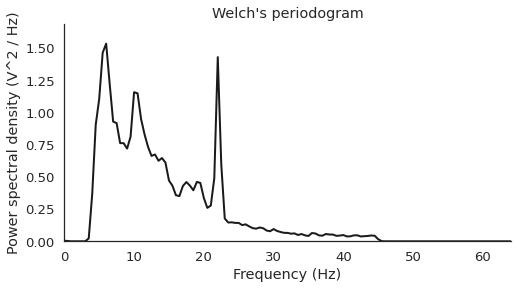

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freq, power, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, power.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freq.max()])
sns.despine()

Считываем данные


In [12]:
import glob
data = []
labels = []
data_dir = './data_preprocessed_python'
files = glob.glob(os.path.join(data_dir, "*.dat"))

for file_data in files:
    raw_data = pickle.load(open(file_data, 'rb'), encoding='latin1')
    data.append(raw_data['data'])
    labels.append(raw_data['labels'])

Выделяем нейтральные эмоции в отдельный класс (0, 1, 2)

In [ ]:
from collections import Counter
labels_3 = []
num_11 = 0
num_12 = 0
num_21 = 0
num_22 = 0
num_10 = 0
num_20 = 0
for i in range(32):
  neg = labels[i] < 3.5
  pos = labels[i] >= 5.5
  temp = np.zeros_like(labels[i], np.int8)
  temp[neg] = 1
  temp[pos] = 2
  #print(labels[i])
  #print(temp)
  labels_3.append(temp)
  cnt1 = Counter()
  cnt1.update(temp[:, 0])
  cnt2 = Counter()
  cnt2.update(temp[:, 1])
  print(cnt1, cnt2)
  num_11 += cnt1[1]
  num_12 += cnt1[2]
  num_10 += cnt1[0]
  num_21 += cnt2[1]
  num_22 += cnt2[2]
  num_20 += cnt2[0]
 
  #break
  #print(temp)
num1 = num_11 + num_12
num2 = num_21 + num_22   
print(num_11/num1, num_12/num1, num_10,num_21/num2, num_22/num2, num_20)   
labels_all_3 = np.vstack(labels_3)  

Counter({2: 18, 1: 16, 0: 6}) Counter({2: 24, 1: 11, 0: 5})
Counter({2: 22, 0: 10, 1: 8}) Counter({0: 17, 2: 16, 1: 7})
Counter({2: 26, 0: 12, 1: 2}) Counter({0: 17, 2: 14, 1: 9})
Counter({2: 25, 1: 9, 0: 6}) Counter({2: 22, 1: 10, 0: 8})
Counter({0: 20, 2: 15, 1: 5}) Counter({2: 18, 0: 18, 1: 4})
Counter({0: 19, 2: 13, 1: 8}) Counter({0: 20, 2: 20})
Counter({2: 18, 0: 13, 1: 9}) Counter({2: 17, 0: 14, 1: 9})
Counter({2: 19, 0: 12, 1: 9}) Counter({1: 19, 2: 12, 0: 9})
Counter({2: 17, 1: 15, 0: 8}) Counter({2: 26, 0: 9, 1: 5})
Counter({0: 15, 2: 13, 1: 12}) Counter({2: 32, 0: 5, 1: 3})
Counter({2: 20, 1: 16, 0: 4}) Counter({2: 27, 1: 11, 0: 2})
Counter({2: 17, 0: 13, 1: 10}) Counter({0: 22, 2: 10, 1: 8})
Counter({0: 15, 1: 13, 2: 12}) Counter({2: 17, 0: 13, 1: 10})
Counter({2: 21, 0: 15, 1: 4}) Counter({2: 24, 0: 12, 1: 4})
Counter({2: 21, 0: 17, 1: 2}) Counter({2: 22, 0: 15, 1: 3})
Counter({2: 19, 0: 11, 1: 10}) Counter({2: 25, 0: 8, 1: 7})
Counter({2: 17, 0: 16, 1: 7}) Counter({2: 21,

а тут только два класса ( положительные и отрицательные)


In [ ]:
from collections import Counter
labels_3 = []
num_11 = 0
num_12 = 0
num_21 = 0
num_22 = 0


for i in range(32):
  neg = labels[i] < 4.5
  pos = labels[i] >= 4.5
  temp = np.zeros_like(labels[i], np.int8)
  temp[neg] = 1
  temp[pos] = 2
  #print(labels[i])
  #print(temp)
  labels_3.append(temp)
  cnt1 = Counter()
  cnt1.update(temp[:, 0])
  cnt2 = Counter()
  cnt2.update(temp[:, 1])
  print(cnt1, cnt2)
  num_11 += cnt1[1]
  num_12 += cnt1[2]
  num_21 += cnt2[1]
  num_22 += cnt2[2]
  #break
  #print(temp)
num1 = num_11 + num_12
num2 = num_21 + num_22   
print(num_11/num1, num_12/num1,num_21/num2, num_22/num2)   
labels_all_3 = np.vstack(labels_3)  

Counter({2: 20, 1: 20}) Counter({2: 25, 1: 15})
Counter({2: 28, 1: 12}) Counter({2: 25, 1: 15})
Counter({2: 33, 1: 7}) Counter({2: 21, 1: 19})
Counter({2: 30, 1: 10}) Counter({2: 25, 1: 15})
Counter({2: 26, 1: 14}) Counter({2: 31, 1: 9})
Counter({2: 23, 1: 17}) Counter({2: 29, 1: 11})
Counter({2: 24, 1: 16}) Counter({2: 23, 1: 17})
Counter({2: 27, 1: 13}) Counter({1: 22, 2: 18})
Counter({2: 23, 1: 17}) Counter({2: 35, 1: 5})
Counter({2: 20, 1: 20}) Counter({2: 35, 1: 5})
Counter({2: 20, 1: 20}) Counter({2: 27, 1: 13})
Counter({2: 22, 1: 18}) Counter({2: 22, 1: 18})
Counter({1: 23, 2: 17}) Counter({2: 20, 1: 20})
Counter({2: 26, 1: 14}) Counter({2: 26, 1: 14})
Counter({2: 30, 1: 10}) Counter({2: 27, 1: 13})
Counter({2: 26, 1: 14}) Counter({2: 28, 1: 12})
Counter({2: 28, 1: 12}) Counter({2: 34, 1: 6})
Counter({2: 25, 1: 15}) Counter({2: 32, 1: 8})
Counter({2: 22, 1: 18}) Counter({2: 29, 1: 11})
Counter({2: 32, 1: 8}) Counter({1: 24, 2: 16})
Counter({1: 21, 2: 19}) Counter({2: 35, 1: 5})


In [13]:
import pandas as pd
# columns = [f'DE_b{i + 1}_c{j + 1}' for i   in range(5) for j in range(32)] + \
#           [f'DASM_b{i + 1}_p{pair}' for i  in range(5) for pair in pairs_canals] + \
#           [f'RASM_b{i + 1}_p{pair}' for i  in range(5) for pair in pairs_canals] + \
#           [f'DCAU_b{i + 1}_p{pair}' for i  in range(5) for pair in pairs_canals_1] 
# columns = [('DE', i, j)  for i  in range(5) for j in range(32)] + \
#           [('DASM', i, pair) for i  in range(5) for pair in pairs_canals] + \
#           [('RASM', i, pair) for i  in range(5) for pair in pairs_canals] + \
#           [('DCAU', i, pair) for i  in range(5) for pair in pairs_canals_1] 
columns = [('DE', i, j)  for i  in range(4) for j in range(32)] + \
          [('DASM', i, j) for i  in range(4) for j in range(14)] + \
          [('RASM', i, j) for i  in range(4) for j in range(14)] + \
          [('DCAU', i, j) for i  in range(4) for j in range(11)] 
features_df = pd.DataFrame(columns = pd.MultiIndex.from_tuples(columns))

In [ ]:
print(features_df)

Empty DataFrame
Columns: [(DE, 0, 0), (DE, 0, 1), (DE, 0, 2), (DE, 0, 3), (DE, 0, 4), (DE, 0, 5), (DE, 0, 6), (DE, 0, 7), (DE, 0, 8), (DE, 0, 9), (DE, 0, 10), (DE, 0, 11), (DE, 0, 12), (DE, 0, 13), (DE, 0, 14), (DE, 0, 15), (DE, 0, 16), (DE, 0, 17), (DE, 0, 18), (DE, 0, 19), (DE, 0, 20), (DE, 0, 21), (DE, 0, 22), (DE, 0, 23), (DE, 0, 24), (DE, 0, 25), (DE, 0, 26), (DE, 0, 27), (DE, 0, 28), (DE, 0, 29), (DE, 0, 30), (DE, 0, 31), (DE, 1, 0), (DE, 1, 1), (DE, 1, 2), (DE, 1, 3), (DE, 1, 4), (DE, 1, 5), (DE, 1, 6), (DE, 1, 7), (DE, 1, 8), (DE, 1, 9), (DE, 1, 10), (DE, 1, 11), (DE, 1, 12), (DE, 1, 13), (DE, 1, 14), (DE, 1, 15), (DE, 1, 16), (DE, 1, 17), (DE, 1, 18), (DE, 1, 19), (DE, 1, 20), (DE, 1, 21), (DE, 1, 22), (DE, 1, 23), (DE, 1, 24), (DE, 1, 25), (DE, 1, 26), (DE, 1, 27), (DE, 1, 28), (DE, 1, 29), (DE, 1, 30), (DE, 1, 31), (DE, 2, 0), (DE, 2, 1), (DE, 2, 2), (DE, 2, 3), (DE, 2, 4), (DE, 2, 5), (DE, 2, 6), (DE, 2, 7), (DE, 2, 8), (DE, 2, 9), (DE, 2, 10), (DE, 2, 11), (DE, 2, 12), (DE

In [14]:
import numpy as np
import scipy
from scipy import stats
freq_resolution = max(freq)/(len(freq) - 1)
from scipy.integrate import simps
max_freq = 128
NVIDEOS = 40
NCANALS = 32
features = ['DE', 'DASM', 'RASM', 'DCAU']
def get_features_whole2(data, labels, freq_resolution, max_freq, feature_list):
  
  data_for_videos = []
  columns = []
  for k  in range(4):
     if 'DE' in feature_list or f'DE{k+1}' in feature_list:
          columns += [('DE', k, j) for j in range(32)] 
     if ('DASM' in feature_list) or (f'DASM{k+1}' in feature_list):
         columns +=     [('DASM', k, j) for j in range(14)] 
     #if 'RASM' in feature_list or f'RASM{k+1}' in feature_list:
     #    columns +=      [('RASM', k, j)  for j in range(14)] 
     if 'DCAU' in feature_list or f'DCAU{k+1}' in feature_list: 
         columns +=     [('DCAU', k, j) for j in range(11)]
     if 'RASM' in feature_list or f'RASM{k+1}' in feature_list:
         columns +=      [('RASM', k, j)  for j in range(14)]     
  columns +=     [('theta/alpha', j) for j in range(32) if 'theta/alpha' in feature_list or f'theta/alpha{j}' in feature_list]
  columns +=     [('beta/theta', j) for j in range(32) if 'beta/theta' in feature_list or f'beta/theta{j}'in feature_list]
  columns +=     [('SMR/theta', j) for j in range(32)if 'SMR/theta' in feature_list or f'SMR/theta{j}'in feature_list]  
  if 'theta/alpha1267' in feature_list:   
        columns +=     [('theta/alpha1267', 0)]     
  #print(columns)            

  features_df = pd.DataFrame(columns = pd.MultiIndex.from_tuples(columns))   

  for id in range(NVIDEOS):
    #data_for_one_video = []
    powers = np.zeros((NCANALS, 6))
    powers_rest = np.zeros((NCANALS,6 ))

    l = 0
    for i in range(NCANALS):
        
        freq, power = scipy.signal.welch(data[id][i], fs=max_freq, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
        freq_rest, power_rest = scipy.signal.welch(data[id][i][ : 128 * 3], fs=max_freq, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
        #one_canal = []
        powers_temp  = []
        powers_temp_rest  = []
        for k, interval in enumerate(freq_ranges):
            ar = np.asarray(interval)
            ar = range(int(interval[0]/freq_resolution), int((interval[-1] + 1)/freq_resolution +1))#(ar / freq_resolution).astype(int)
            #print(ar)
            power_range = power[ar]
            mean_power = simps(power[ar], dx = 0.5)#(power_range).sum()/len(power_range)
            mean_power_rest = simps(power_rest[ar], dx = 0.5)#(power_range).sum()/len(power_range)
            if k < 4:
              if 'DE' in feature_list or f'DE{k+1}' in feature_list:
                   features_df.loc[id, ('DE', k, i)] = np.log(mean_power)
            powers_temp.append(mean_power)
            powers[i, k] = mean_power
            powers_temp_rest.append(mean_power_rest)
            powers_rest[i, k] = mean_power_rest
           
    #print(len(features_df.columns))       
    for s, pair in enumerate(pairs_canals):
        #print(pair)
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp = np.log(powers[canal_1]) -  np.log(powers[canal_2]) 
        #print(temp.shape)
        for k in range(4):
          if ('DASM' in feature_list) or (f'DASM{k+1}' in feature_list):
             #data_for_one_video.extend([temp[k]])  
             features_df.loc[id, ('DASM', k, s)] = temp[k]
             #print('**1')
        #print(len(data_for_one_video))
        temp = np.log(powers[canal_1])/np.log(powers[canal_2])
        #print(temp)
        for k in range(4):
          if 'RASM' in feature_list or f'RASM{k+1}' in feature_list:
             #data_for_one_video.extend([temp[k]]) 
             features_df.loc[id, ('RASM', k, s)] = temp[k]   
             #print('**3')
        #data_for_one_video.append(one_canal)    
    #print(len(features_df.columns))
    for s, pair in enumerate(pairs_canals_1):
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp =  np.log(powers[canal_1]) -   np.log(powers[canal_2])
        #print(temp)
        for k in range(4):
          if 'DCAU' in feature_list or f'DCAU{k+1}' in feature_list:
             #data_for_one_video.extend([temp[k]]) 
             features_df.loc[id, ('DCAU', k, s)] = temp[k]
             #print('**2')
    for j  in range(32):
        #print("")
        if f'SMR/theta{j}' in feature_list or 'SMR/theta' in feature_list:
             index = (powers[j, 4] + powers[j, 5])/powers[j, 0]
             index_rest = (powers_rest[j, 4] + powers_rest[j, 5])/powers_rest[j, 0] 
             value = (index - index_rest)/index_rest
             features_df.loc[id, ('SMR/theta', j)] = value
    for j  in range(32):
        if f'beta/theta{j}' in feature_list or 'beta/theta' in feature_list:
              index = powers[j, 2]/powers[j, 0]
              index_rest = powers_rest[j, 2]/powers_rest[j, 0] 
              value = (index - index_rest)/index_rest
              features_df.loc[id, ('beta/theta', j)] = value
              #data_for_one_video.extend([value])
              
    for j  in range(32):
        if f'theta/alpha{j}' in feature_list or 'theta/alpha' in feature_list:
            index = powers[j, 0]/powers[j, 1]
            index_rest = powers_rest[j, 0]/powers_rest[j, 1] 
            value = (index - index_rest)/index_rest
            features_df.loc[id, ('theta/alpha', j)] = value
            #data_for_one_video.extend([value])
    #print(len(features_df.columns))        
    if 'theta/alpha1267' in feature_list:
           index1 = powers[6, 0]/powers[6, 1]
           index_rest1 = powers_rest[7, 0]/powers_rest[7, 1] 
           value1 = (index1 - index_rest1)/index_rest1
           index2 = powers[0, 0]/powers[0, 1]
           index_rest2 = powers_rest[0, 0]/powers_rest[0, 1] 
           value2 = (index2 - index_rest2)/index_rest2

           features_df.loc[id, ('theta/alpha1267', 0)] = value1/value2                           

    #print(len(features_df.columns))
  return features_df   



In [ ]:
import pandas as pd
emotion = ['valence', 'arousal']#, 'dominance', 'like']
f1_data_sum = pd.DataFrame(columns = features, index = emotion)
acc_data_sum = pd.DataFrame(columns = features, index = emotion)


In [ ]:
 from mrmr import mrmr_classif

In [ ]:
def discretize(df, k):
  labels = range(k)
  for col in df.columns.to_list()[1 : ]:
     df[col] = pd.qcut(df[col], q = 5, labels=labels)
  return df   

In [15]:
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import  GaussianNB
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from imblearn.over_sampling import RandomOverSampler 
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import svm
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
#threshold = 0.5
k = 5
labels_common = []
emotions = ['valence', 'arousal']

def get_metrics(features, pca_include = False):
    result_f1 = []
    result_acc = []
    #data_for_videos = []
    features_all = []

    for i in  range(len(data)):
            features_df = get_features_whole2(data[i], labels[i], freq_resolution, max_freq, features )
            #data_for_videos.append(result)
            features_all.append(features_df)
    for i_em in range(2):
        print(emotions[i_em])
        first = True
        f1_all = []
        acc_all = []
        train_indexes = []
        test_indexes = []
        for j in range(32):
                # labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
            train_indexes.append([])    
            test_indexes.append([])    
            #X = np.arange(40)
            y = np.array(labels_3[j][:, i_em])
            y = y[y!=0]
            #print(y)
            X = np.arange(len(y))
            
            if len(y) != 0 :
                skf = StratifiedKFold(n_splits=k, random_state=2021, shuffle=True)
                #kf = KFold(n_splits=k, random_state=None, shuffle=True)
                for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
                #for fold, (train_index, test_index) in enumerate(kf.split(X)):
                    train_indexes[-1].append(train_index)
                    test_indexes[-1].append(test_index)
            else:
               for fold in range(k):
                  train_indexes[-1].append([])
                  test_indexes[-1].append([])      
        
        f1_data = pd.DataFrame(columns = range(k), index = range(32))
        acc_data = pd.DataFrame(columns = range(k), index = range(32))

        for fold in range(k):
            #print(fold)
            first = False
            features_no_neutral = []
            
            f1_sub = []
            acc_sub = []

            data_train = []
            data_test = []
            labels_train = []
            labels_test = []
            labels_check = []
            for i in range(32):
             
                  #print( labels_subject_train[i])
               ltemp = labels_3[i][:, i_em]

                  #print(ltemp)
               ltemp1 = ltemp[ltemp != 0]
               if len(ltemp1) != 0:   
                  data_temp = features_all[i][ltemp != 0 ].values
                  #print(data_temp.shape)
                  data_subject_train = data_temp[train_indexes[i][fold]]
                  #print(data_subject_train.shape)
                  labels_subject_train = ltemp1[train_indexes[i][fold]]
                  features_temp= features_all[i][ltemp != 0 ]
                  features_temp = features_temp.iloc[train_indexes[i][fold], :]
                  features_no_neutral.append(features_temp)
                  #print( labels_subject_train)


                  #if len(labels_subject_train[labels_subject_train == 1]) != 0 and  len(labels_subject_train[labels_subject_train == 2]) != 0:
                  #    ros = RandomOverSampler(random_state=42)
                  #    data_subject_train, labels_subject_train = ros.fit_resample(data_subject_train, labels_subject_train)

                  data_train.append(data_subject_train)
                  labels_train.extend(labels_subject_train)

                  data_subject_test = data_temp[test_indexes[i][fold]]
                  labels_subject_test = ltemp1[test_indexes[i][fold]]
                  #if len(labels_subject_test[labels_subject_test == 1]) != 0 and  len(labels_subject_test[labels_subject_test == 2]) != 0:
                  #    ros = RandomOverSampler(random_state=42)
                  #    data_subject_test, labels_subject_test = ros.fit_resample(data_subject_test, labels_subject_test)

                  data_test.append(data_subject_test)
                  labels_test.extend(labels_subject_test)
                  labels_check.append(labels_subject_test)

            data_train_all = np.vstack(data_train)
            data_test_all = np.vstack(data_test)   
            data_all = np.vstack((data_train_all, data_test_all))
            labels_all = np.hstack((labels_train, labels_test))
            #print(data_all.shape)
            features_result = pd.concat(features_no_neutral)
            if first == True:

                # features_result = pd.concat(features_no_neutral, ignore_index=True)
                # print(features_result.shape)

                # columns_new = ['_'.join(list(map(str, tup))) for tup in features_result.columns]
                # features_result.columns = columns_new
                # #from mrmr import mrmr_classif
                # #y = pd.Series(labels_train)
                # #result = mrmr_classif(X=features_result, y=y, K=100)
                # #print(result)
                # #print(features_result.head())
                # result = (pymrmr.mRMR(features_result, 'MIQ', 10))
                # #result = (pymrmr.mRMR(features_result, 'MID', 140))
                # choice = []
                # #print(len(features_result.columns))
                # print(result)
                # choice = [features_result.columns.to_list().index(feat) for feat in result ]
                # #print(len(choice))

                # first = False
                features_result = pd.concat(features_no_neutral)
               # features_result = pd.DataFrame()
                features_result['target'] = labels_train
                print('****')
                columns_new = ['_'.join(list(map(str, tup))) for tup in features_result.columns]
                features_result.columns = columns_new
                #cols = features_result1.columns
                #print(cols)
                #print(features_result.head())
                #print(features_result1.head())

                cols = features_result.columns.tolist()[-1:] + features_result.columns.tolist()[:-1]
                features_result = features_result[cols]
                #features_result = discretize(features_result, 5)
                #features_result[cols] = features_result1[cols]              print('****')
                #columns_new = ['_'.join(list(map(str, tup))) for tup in features_result.columns]
                #print('****')
                #features_result.columns = columns_new
                #print(features_result.head())
                result = (pymrmr.mRMR(features_result, 'MIQ', 140))
                #result = (pymrmr.mRMR(features_result, 'MID', 140))
                choice = []
                ##print(len(features_result.columns))
                #print(result)
                choice = [features_result.columns.to_list().index(feat) - 1 for feat in result ]
                #print(len(choice))

                first = False
            #data_train_all = data_train_all[:, choice]
            #data_test_all = data_test_all[:, choice]
            model = lgbm.sklearn.LGBMClassifier(n_estimators = 100, class_weight = 'balanced', min_data_in_leaf = 30 )#!!!!!!!
            #model = RandomForestClassifier(n_estimators = 100,  class_weight = 'balanced')
            #model = ExtraTreesClassifier()
            if pca_include == True:
                ss = StandardScaler()
                data_train_all = ss.fit_transform(data_train_all)
                pca = PCA(n_components=int(data_train_all.shape[1]), svd_solver='full')
                data_train_all = pca.fit_transform(data_train_all)
            #print(pca.singular_values_)
            #print(data_train_all.shape)
       
            #clf = LDA(n_components = 1)
            #data_train_all = clf.fit_transform(data_train_all, labels_train)
            #model =  GaussianNB()
            #print(data_train_all)
            model = model.fit(data_train_all, labels_train)
            #clf = SelectFromModel(model, max_features = 50, prefit=True)
            #data_train_all = clf.transform(data_train_all)
            #print(data_train_all.shape)
            #model = RandomForestClassifier(n_estimators = 100,  class_weight = 'balanced')
            #model.fit(data_train_all, labels_train)
            #print("***")
            #print(model.feature_importances_)
            cnt_train = Counter()
            cnt_train.update(labels_train)
            #print(labels_train)
            #print(cnt_train)
            cnt_test = Counter()
            cnt_test.update(labels_test)
            #print(labels_train)
            #print(cnt_test)
            if pca_include == True:
                data_test_all = ss.transform(data_test_all)
                data_test_all = pca.transform(data_test_all)
            #data_test_all = clf.transform(data_test_all)
            #data_test_all = clf.transform(X = data_test_all)
            labels_predicted = model.predict(data_test_all)
           
            f1_all.append(f1_score(labels_predicted, labels_test, average = 'macro'))
            acc_all.append(accuracy_score(labels_predicted, labels_test)) 
            f1_sub = []
            acc_sub = []
            for i in range(32):
                 if len(labels_check[i]) != 0:
                     #labels_predicted_sub = [2] * len(data_test[i]) # model.predict(data_test[i])
                     #print(labels_predicted_sub)
                     if pca_include == True:
                        data_test[i] = ss.transform(data_test[i])
                        data_test[i] = pca.transform(data_test[i])
                     #data_test[i] = clf.transform(data_test[i])
                     #data_test[i] =  clf.transform(X = data_test[i])
                     #data_test[i] = data_test[i][:, choice]
                     labels_predicted_sub = model.predict(data_test[i])
                     f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_check[i], average = 'macro'))
                     acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_check[i]))  
                 else:
                     print("!!!!!!")
                     f1_data.loc[i, fold] = 0.5#(f1_score(labels_predicted_sub, labels_check[i], average = 'macro'))
                     acc_data.loc[i, fold] = 0.5# (accuracy_score(labels_predicted_sub, labels_check[i]))  


                 #print(confusion_matrix(labels_predicted_sub, labels_check[i]))
            #break     
        
        print(f"f1 = {np.mean(f1_data.values.mean(axis = 1))}")
        print(f"acc = {np.mean(acc_data.values.mean(axis = 1))}")

        print("*************************")
        # print(f1_all)
        # print(acc_all)
        # print(np.mean(f1_all))    
        # print(np.mean(acc_all)) 
        result_f1.append(np.mean(f1_data.values.mean(axis = 1))) 
        result_acc.append(np.mean(acc_data.values.mean(axis = 1)))
        print  
    return result_f1, result_acc, f1_data, acc_data, data_all, labels_all, features_result
                     
       

#C нейтральными

In [ ]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['theta/alpha', 'beta/theta', 'SMR/theta', 'theta/alpha1267'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence
f1 = 0.5024274683649683
acc = 0.5945312500000001
*************************
arousal
f1 = 0.5088007131757132
acc = 0.61953125
*************************


In [ ]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['theta/alpha1267'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence
f1 = 0.46376869658119657
acc = 0.50703125
*************************
arousal
f1 = 0.4662075424575424
acc = 0.51328125
*************************


In [ ]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['theta/alpha'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence
f1 = 0.49129089660339653
acc = 0.5820312499999999
*************************
arousal
f1 = 0.4842516164391164
acc = 0.5820312500000001
*************************


In [ ]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['beta/theta'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence
f1 = 0.47517635142635134
acc = 0.5632812500000001
*************************
arousal
f1 = 0.48729908979908976
acc = 0.59140625
*************************


In [ ]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics([ 'SMR/theta'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence
f1 = 0.49467574092574107
acc = 0.5749999999999998
*************************
arousal
f1 = 0.48822680791430795
acc = 0.58046875
*************************


In [ ]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['DE', 'DASM', 'RASM', 'DCAU'])
f1_data_sum['ALL4'] = result_f1
acc_data_sum['ALL4'] = result_acc
print(acc_data_sum)
print(f1_data_sum)

valence
f1 = 0.6023541389166391
acc = 0.69140625
*************************
arousal
f1 = 0.5083952852702852
acc = 0.6492187500000001
*************************
          DE DASM RASM DCAU      ALL4
valence  NaN  NaN  NaN  NaN  0.691406
arousal  NaN  NaN  NaN  NaN  0.649219
          DE DASM RASM DCAU      ALL4
valence  NaN  NaN  NaN  NaN  0.602354
arousal  NaN  NaN  NaN  NaN  0.508395


In [ ]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['DE', 'DASM', 'RASM', 'DCAU', 'theta/alpha', 'beta/theta', 'SMR/theta', 'theta/alpha1267'], pca_include = True)
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence
f1 = 0.4810465576090577
acc = 0.6117187499999998
*************************
arousal
f1 = 0.49547594766344766
acc = 0.65234375
*************************


In [ ]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['DE',  'RASM', 'DCAU'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence
f1 = 0.5931644397269399
acc = 0.6851562500000001
*************************
arousal
f1 = 0.5045511433011433
acc = 0.64609375
*************************


In [ ]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics([ 'DASM', 'RASM', 'DCAU'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence
f1 = 0.5907802614052613
acc = 0.6859375
*************************
arousal
f1 = 0.4926720501720502
acc = 0.6359374999999999
*************************


In [ ]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['DE', 'RASM'])#, 'beta/theta', 'SMR/theta', 'theta/alpha1267'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence
f1 = 0.5802203005328006
acc = 0.6726562500000002
*************************
arousal
f1 = 0.5143552281052282
acc = 0.64765625
*************************


In [ ]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['DE', 'DASM'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence
f1 = 0.5834342393717394
acc = 0.6742187500000001
*************************
arousal
f1 = 0.5141657647907647
acc = 0.65390625
*************************


In [ ]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['DE', 'DASM', 'RASM'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence
f1 = 0.5822552794427793
acc = 0.6710937500000002
*************************
arousal
f1 = 0.5152188436563437
acc = 0.65625
*************************


In [ ]:
# features = []
# for i in range(2, 4):
#     features = features + ([f'DE{i + 1}'])
# for i in range(0, 4):
#     features = features + ([f'DASM{i + 1}'])   
# print(features)     
# result_f1, result_acc, _, _, _, _, _ = get_metrics(features)
# print(result_f1)
# f1_data_bands_val.loc['DE', bands[i]] = result_f1[0]
# acc_data_bands_val.loc['DE', bands[i]] = result_acc[0]
# f1_data_bands_arousal.loc['DE', bands[i]] = result_f1[1]
# acc_data_bands_arousal.loc['DE', bands[i]] = result_acc[1]

In [ ]:
import pandas as pd
bands = [ 'theta',  'alpha', 'beta' ,'gamma']
index = ['DE', 'DASM', 'RASM', 'DCAU']
f1_data_bands_val = pd.DataFrame(columns = bands, index = index)
acc_data_bands_val = pd.DataFrame(columns = bands, index = index)
f1_data_bands_arousal = pd.DataFrame(columns = bands, index = index)
acc_data_bands_arousal = pd.DataFrame(columns = bands, index = index)

In [ ]:
for i in range(4):
    result_f1, result_acc, _, _, _, _, _ = get_metrics([f'DE{i + 1}'])
    print(result_f1)
    f1_data_bands_val.loc['DE', bands[i]] = result_f1[0]
    acc_data_bands_val.loc['DE', bands[i]] = result_acc[0]
    f1_data_bands_arousal.loc['DE', bands[i]] = result_f1[1]
    acc_data_bands_arousal.loc['DE', bands[i]] = result_acc[1]


valence
f1 = 0.5270640817515818
acc = 0.61875
*************************
arousal
f1 = 0.5027016039516038
acc = 0.6234374999999998
*************************
[0.5270640817515818, 0.5027016039516038]
valence
f1 = 0.5482748154623153
acc = 0.6414062500000002
*************************
arousal
f1 = 0.471294746919747
acc = 0.60625
*************************
[0.5482748154623153, 0.471294746919747]
valence
f1 = 0.5594029928404929
acc = 0.64765625
*************************
arousal
f1 = 0.5073276723276723
acc = 0.6406249999999999
*************************
[0.5594029928404929, 0.5073276723276723]
valence
f1 = 0.5270749736374737
acc = 0.6187499999999999
*************************
arousal
f1 = 0.529507645132645
acc = 0.6546874999999999
*************************
[0.5270749736374737, 0.529507645132645]


In [ ]:
for i in range(4):
    result_f1, result_acc,  _, _, _, _, _ = get_metrics([f'DASM{i + 1}'])
    print(result_f1)
    f1_data_bands_val.loc['DASM', bands[i]] = result_f1[0]
    acc_data_bands_val.loc['DASM', bands[i]] = result_acc[0]
    f1_data_bands_arousal.loc['DASM', bands[i]] = result_f1[1]
    acc_data_bands_arousal.loc['DASM', bands[i]] = result_acc[1]

valence
f1 = 0.5125003815628816
acc = 0.61328125
*************************
arousal
f1 = 0.49135801698301684
acc = 0.6265625
*************************
[0.5125003815628816, 0.49135801698301684]
valence
f1 = 0.5472318306693306
acc = 0.64140625
*************************
arousal
f1 = 0.4801363220113221
acc = 0.61015625
*************************
[0.5472318306693306, 0.4801363220113221]
valence
f1 = 0.5386004967254968
acc = 0.63515625
*************************
arousal
f1 = 0.5190758200133202
acc = 0.6445312500000001
*************************
[0.5386004967254968, 0.5190758200133202]
valence
f1 = 0.5518290390165389
acc = 0.6429687500000001
*************************
arousal
f1 = 0.49199664918414915
acc = 0.6234374999999999
*************************
[0.5518290390165389, 0.49199664918414915]


In [ ]:
for i in range(4):
    result_f1, result_acc,  _, _, _, _, _= get_metrics([f'RASM{i + 1}'])
    print(result_f1)
    f1_data_bands_val.loc['RASM', bands[i]] = result_f1[0]
    acc_data_bands_val.loc['RASM', bands[i]] = result_acc[0]
    f1_data_bands_arousal.loc['RASM', bands[i]] = result_f1[1]
    acc_data_bands_arousal.loc['RASM', bands[i]] = result_acc[1]

valence
f1 = 0.5381387362637362
acc = 0.6375
*************************
arousal
f1 = 0.4996760878010878
acc = 0.6351562499999999
*************************
[0.5381387362637362, 0.4996760878010878]
valence
f1 = 0.5367626817626817
acc = 0.6320312499999999
*************************
arousal
f1 = 0.45438890970140966
acc = 0.5945312500000001
*************************
[0.5367626817626817, 0.45438890970140966]
valence
f1 = 0.5436574189699188
acc = 0.6445312499999999
*************************
arousal
f1 = 0.5110374347874348
acc = 0.63984375
*************************
[0.5436574189699188, 0.5110374347874348]
valence
f1 = 0.5386226967476968
acc = 0.6296875000000001
*************************
arousal
f1 = 0.504522526085026
acc = 0.6359375000000002
*************************
[0.5386226967476968, 0.504522526085026]


In [ ]:
for i in range(4):
    result_f1, result_acc, _, _, _, _, _ = get_metrics([f'DCAU{i + 1}'])
    print(result_f1)
    f1_data_bands_val.loc['DCAU', bands[i]] = result_f1[0]
    acc_data_bands_val.loc['DCAU', bands[i]] = result_acc[0]
    f1_data_bands_arousal.loc['DCAU', bands[i]] = result_f1[1]
    acc_data_bands_arousal.loc['DCAU', bands[i]] = result_acc[1]

valence
f1 = 0.519166285103785
acc = 0.6124999999999999
*************************
arousal
f1 = 0.4728862110112111
acc = 0.6054687499999999
*************************
[0.519166285103785, 0.4728862110112111]
valence
f1 = 0.5224953865578864
acc = 0.6265625
*************************
arousal
f1 = 0.4818385087135086
acc = 0.6046875
*************************
[0.5224953865578864, 0.4818385087135086]
valence
f1 = 0.5301396520146521
acc = 0.6179687500000001
*************************
arousal
f1 = 0.5025650044400045
acc = 0.6359375
*************************
[0.5301396520146521, 0.5025650044400045]
valence
f1 = 0.5502113858363857
acc = 0.6281249999999999
*************************
arousal
f1 = 0.49963068181818177
acc = 0.6312500000000001
*************************
[0.5502113858363857, 0.49963068181818177]


In [ ]:
print(acc_data_bands_val)
print(f1_data_bands_val)
print(acc_data_bands_arousal)
print(f1_data_bands_arousal)

         theta     alpha      beta     gamma
DE     0.61875  0.641406  0.647656   0.61875
DASM  0.613281  0.641406  0.635156  0.642969
RASM    0.6375  0.632031  0.644531  0.629688
DCAU    0.6125  0.626563  0.617969  0.628125
         theta     alpha      beta     gamma
DE    0.527064  0.548275  0.559403  0.527075
DASM    0.5125  0.547232    0.5386  0.551829
RASM  0.538139  0.536763  0.543657  0.538623
DCAU  0.519166  0.522495   0.53014  0.550211
         theta     alpha      beta     gamma
DE    0.623437   0.60625  0.640625  0.654687
DASM  0.626563  0.610156  0.644531  0.623437
RASM  0.635156  0.594531  0.639844  0.635938
DCAU  0.605469  0.604688  0.635938   0.63125
         theta     alpha      beta     gamma
DE    0.502702  0.471295  0.507328  0.529508
DASM  0.491358  0.480136  0.519076  0.491997
RASM  0.499676  0.454389  0.511037  0.504523
DCAU  0.472886  0.481839  0.502565  0.499631


#Без нейтральных

In [16]:
from collections import Counter
labels_3 = []
num_11 = 0
num_12 = 0
num_21 = 0
num_22 = 0
num_10 = 0
num_20 = 0
for i in range(32):
  neg = labels[i] < 3.5
  pos = labels[i] >= 5.5
  temp = np.zeros_like(labels[i], np.int8)
  temp[neg] = 1
  temp[pos] = 2
  #print(labels[i])
  #print(temp)
  labels_3.append(temp)
  cnt1 = Counter()
  cnt1.update(temp[:, 0])
  cnt2 = Counter()
  cnt2.update(temp[:, 1])
  print(cnt1, cnt2)
  num_11 += cnt1[1]
  num_12 += cnt1[2]
  num_10 += cnt1[0]
  num_21 += cnt2[1]
  num_22 += cnt2[2]
  num_20 += cnt2[0]
 
  #break
  #print(temp)
num1 = num_11 + num_12
num2 = num_21 + num_22   
print(num_11/num1, num_12/num1, num_10,num_21/num2, num_22/num2, num_20)   
labels_all_3 = np.vstack(labels_3)  

Counter({2: 18, 1: 16, 0: 6}) Counter({2: 24, 1: 11, 0: 5})
Counter({2: 22, 0: 10, 1: 8}) Counter({0: 17, 2: 16, 1: 7})
Counter({2: 26, 0: 12, 1: 2}) Counter({0: 17, 2: 14, 1: 9})
Counter({2: 25, 1: 9, 0: 6}) Counter({2: 22, 1: 10, 0: 8})
Counter({0: 20, 2: 15, 1: 5}) Counter({2: 18, 0: 18, 1: 4})
Counter({0: 19, 2: 13, 1: 8}) Counter({0: 20, 2: 20})
Counter({2: 18, 0: 13, 1: 9}) Counter({2: 17, 0: 14, 1: 9})
Counter({2: 19, 0: 12, 1: 9}) Counter({1: 19, 2: 12, 0: 9})
Counter({2: 17, 1: 15, 0: 8}) Counter({2: 26, 0: 9, 1: 5})
Counter({0: 15, 2: 13, 1: 12}) Counter({2: 32, 0: 5, 1: 3})
Counter({2: 20, 1: 16, 0: 4}) Counter({2: 27, 1: 11, 0: 2})
Counter({2: 17, 0: 13, 1: 10}) Counter({0: 22, 2: 10, 1: 8})
Counter({0: 15, 1: 13, 2: 12}) Counter({2: 17, 0: 13, 1: 10})
Counter({2: 21, 0: 15, 1: 4}) Counter({2: 24, 0: 12, 1: 4})
Counter({2: 21, 0: 17, 1: 2}) Counter({2: 22, 0: 15, 1: 3})
Counter({2: 19, 0: 11, 1: 10}) Counter({2: 25, 0: 8, 1: 7})
Counter({2: 17, 0: 16, 1: 7}) Counter({2: 21,

In [17]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['theta/alpha', 'beta/theta', 'SMR/theta', 'theta/alpha1267'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.4966272095959598
acc = 0.631748511904762
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.4976094565157065
acc = 0.6487574404761904
*************************


In [18]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['theta/alpha1267'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.4695952831890331
acc = 0.5290624999999999
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.49866229256854266
acc = 0.5699479166666666
*************************


In [19]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['theta/alpha'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5008576839826839
acc = 0.6164508928571428
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.4940057338494838
acc = 0.6181547619047618
*************************


In [20]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['beta/theta'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.4783035714285715
acc = 0.6111458333333333
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.47187581515706506
acc = 0.6146726190476189
*************************


In [21]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics([ 'SMR/theta'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.4772918921356421
acc = 0.6028497023809524
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.49278729950604955
acc = 0.6309375
*************************


In [23]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['DE', 'DASM', 'RASM', 'DCAU'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.6612019751082251
acc = 0.7571279761904761
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5745868888056388
acc = 0.72953125
*************************


In [24]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['DE', 'DASM', 'RASM', 'DCAU', 'theta/alpha', 'beta/theta', 'SMR/theta', 'theta/alpha1267'], pca_include = True)
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):


valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.554749053030303
acc = 0.6862276785714287
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5397986908924409
acc = 0.7037202380952382
*************************


In [25]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['DE',  'RASM', 'DCAU'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.6419726280663781
acc = 0.7360193452380951
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5721655427905427
acc = 0.7238095238095238
*************************


In [26]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics([ 'DASM', 'RASM', 'DCAU'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.6208581349206349
acc = 0.7337425595238096
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5627558552558554
acc = 0.7217187499999997
*************************


In [27]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['DE', 'RASM'])#, 'beta/theta', 'SMR/theta', 'theta/alpha1267'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.6213667929292931
acc = 0.7208333333333333
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5842442626817629
acc = 0.7402232142857144
*************************


In [28]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['DE', 'DASM'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.6638359036796538
acc = 0.7588020833333334
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5510116272616272
acc = 0.716279761904762
*************************


In [29]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all, features_df_all = get_metrics(['DE', 'DASM', 'RASM'])
# f1_data_sum['ALL4'] = result_f1
# acc_data_sum['ALL4'] = result_acc
# print(acc_data_sum)
# print(f1_data_sum)

valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.6510344516594517
acc = 0.748735119047619
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.575796078921079
acc = 0.7209151785714286
*************************


In [30]:
import pandas as pd
bands = [ 'theta',  'alpha', 'beta' ,'gamma']
index = ['DE', 'DASM', 'RASM', 'DCAU']
f1_data_bands_val = pd.DataFrame(columns = bands, index = index)
acc_data_bands_val = pd.DataFrame(columns = bands, index = index)
f1_data_bands_arousal = pd.DataFrame(columns = bands, index = index)
acc_data_bands_arousal = pd.DataFrame(columns = bands, index = index)

In [31]:
for i in range(4):
    result_f1, result_acc, _, _, _, _, _ = get_metrics([f'DE{i + 1}'])
    print(result_f1)
    f1_data_bands_val.loc['DE', bands[i]] = result_f1[0]
    acc_data_bands_val.loc['DE', bands[i]] = result_acc[0]
    f1_data_bands_arousal.loc['DE', bands[i]] = result_f1[1]
    acc_data_bands_arousal.loc['DE', bands[i]] = result_acc[1]


valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5653835227272729
acc = 0.668110119047619
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5429088793151293
acc = 0.6984375
*************************
[0.5653835227272729, 0.5429088793151293]
valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5746590909090911
acc = 0.6766815476190476
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5378731164668664
acc = 0.6893005952380953
*************************
[0.5746590909090911, 0.5378731164668664]
valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.6150656114718615
acc = 0.7100372023809524
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5401313616938616
acc = 0.692157738095238
*************************
[0.6150656114718615, 0.5401313616938616]
valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5949745220057722
acc = 0.697938988095238
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5450480075480078
acc = 0.6939211309523811
*************************
[0.5949745220057722, 0.5450480075480078]


In [32]:
for i in range(4):
    result_f1, result_acc,  _, _, _, _, _ = get_metrics([f'DASM{i + 1}'])
    print(result_f1)
    f1_data_bands_val.loc['DASM', bands[i]] = result_f1[0]
    acc_data_bands_val.loc['DASM', bands[i]] = result_acc[0]
    f1_data_bands_arousal.loc['DASM', bands[i]] = result_f1[1]
    acc_data_bands_arousal.loc['DASM', bands[i]] = result_acc[1]

valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5723365349927849
acc = 0.6803869047619049
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.513812663031413
acc = 0.6742410714285715
*************************
[0.5723365349927849, 0.513812663031413]
valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5664507887945387
acc = 0.6815848214285715
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5358476072538574
acc = 0.6948883928571429
*************************
[0.5664507887945387, 0.5358476072538574]
valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.6140113185425686
acc = 0.7123065476190477
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5544455197580198
acc = 0.6947172619047616
*************************
[0.6140113185425686, 0.5544455197580198]
valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5632215007215008
acc = 0.6811979166666667
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5655787615162615
acc = 0.6985491071428571
*************************
[0.5632215007215008, 0.5655787615162615]


In [33]:
for i in range(4):
    result_f1, result_acc,  _, _, _, _, _= get_metrics([f'RASM{i + 1}'])
    print(result_f1)
    f1_data_bands_val.loc['RASM', bands[i]] = result_f1[0]
    acc_data_bands_val.loc['RASM', bands[i]] = result_acc[0]
    f1_data_bands_arousal.loc['RASM', bands[i]] = result_f1[1]
    acc_data_bands_arousal.loc['RASM', bands[i]] = result_acc[1]

valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5762554112554114
acc = 0.6789434523809523
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5243016358641358
acc = 0.6825595238095238
*************************
[0.5762554112554114, 0.5243016358641358]
valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5654008838383839
acc = 0.683936011904762
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5217057768620268
acc = 0.6745833333333333
*************************
[0.5654008838383839, 0.5217057768620268]
valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.6064472853535355
acc = 0.7051488095238098
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5478755099067599
acc = 0.7008556547619047
*************************
[0.6064472853535355, 0.5478755099067599]
valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.6059900342712845
acc = 0.7021056547619048
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.564085705960706
acc = 0.7048214285714286
*************************
[0.6059900342712845, 0.564085705960706]


In [34]:
for i in range(4):
    result_f1, result_acc, _, _, _, _, _ = get_metrics([f'DCAU{i + 1}'])
    print(result_f1)
    f1_data_bands_val.loc['DCAU', bands[i]] = result_f1[0]
    acc_data_bands_val.loc['DCAU', bands[i]] = result_acc[0]
    f1_data_bands_arousal.loc['DCAU', bands[i]] = result_f1[1]
    acc_data_bands_arousal.loc['DCAU', bands[i]] = result_acc[1]

valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5355000901875901
acc = 0.649203869047619
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5079681082806083
acc = 0.6636011904761903
*************************
[0.5355000901875901, 0.5079681082806083]
valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5471588654401155
acc = 0.6599032738095238
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.557169497169497
acc = 0.6955654761904762
*************************
[0.5471588654401155, 0.557169497169497]
valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5766420905483406
acc = 0.6800595238095238
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5314237845487845
acc = 0.6858482142857144
*************************
[0.5766420905483406, 0.5314237845487845]
valence


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5677011183261182
acc = 0.6675372023809524
*************************
arousal


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

f1 = 0.5636475850538352
acc = 0.7111160714285716
*************************
[0.5677011183261182, 0.5636475850538352]


In [36]:
print(acc_data_bands_val)
print(f1_data_bands_val)
print(acc_data_bands_arousal)
print(f1_data_bands_arousal)

         theta     alpha      beta     gamma
DE     0.66811  0.676682  0.710037  0.697939
DASM  0.680387  0.681585  0.712307  0.681198
RASM  0.678943  0.683936  0.705149  0.702106
DCAU  0.649204  0.659903   0.68006  0.667537
         theta     alpha      beta     gamma
DE    0.565384  0.574659  0.615066  0.594975
DASM  0.572337  0.566451  0.614011  0.563222
RASM  0.576255  0.565401  0.606447   0.60599
DCAU    0.5355  0.547159  0.576642  0.567701
         theta     alpha      beta     gamma
DE    0.698438  0.689301  0.692158  0.693921
DASM  0.674241  0.694888  0.694717  0.698549
RASM   0.68256  0.674583  0.700856  0.704821
DCAU  0.663601  0.695565  0.685848  0.711116
         theta     alpha      beta     gamma
DE    0.542909  0.537873  0.540131  0.545048
DASM  0.513813  0.535848  0.554446  0.565579
RASM  0.524302  0.521706  0.547876  0.564086
DCAU  0.507968  0.557169  0.531424  0.563648
